In [36]:
import os
import json
import csv
import glob
import datetime
import requests
import numpy as np
import pandas as pd
from os import listdir
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
### Atlanta Pre-Work ###
# Combine the multiple file for Atlanta into one CSV
# path = r'C:\Users\patri\Google Drive\Group Project\GroupPoject01Files\patrick_stuff\atl'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# df_from_each_file = (pd.read_csv(f) for f in all_files)
# atl_complete_df = pd.concat(df_from_each_file, ignore_index=True, sort=True)

# # Changing time format and capitalization of UCR
# atl_complete_df[['Year', 'Month', 'Day']] = atl_complete_df['Report Date'].astype(str).str.split("-",expand=True,)
# atl_complete_df = atl_complete_df.apply(lambda x: x.str.title() if x.dtype == "object" else x) 

# # Shape the combined CSV into a more manageable DataFrame
# atl_sorted_df = atl_complete_df.loc[:, ["UCR Literal", "UCR #", "Month", "Day", "Year", "Latitude", "Longitude"]]

# # Rename a few things
# atl_df = atl_sorted_df.rename(columns={"UCR Literal" : "Crime", "UCR #" : "UCR Code"})

atl_df = pd.read_csv("atl.csv")

In [3]:
# atl_df.to_csv("patrick_stuff/atl.csv", index=False)
# mn_df.to_csv("patrick_stuff/mn.csv", index=False)

In [3]:
atl_backup_df = atl_df

In [4]:
atl_combined_crime = atl_df.replace({
    "Larceny-From Vehicle" : "Theft",
    "Larceny-Non Vehicle" : "Theft",
    "Burglary-Residence": "Burglary",
    "Burglary-Nonres": "Burglary",
    "Robbery-Pedestrian" : "Robbery",
    "Robbery-Commercial" : "Robbery",
    "Robbery-Residence" : "Robbery",
    "Agg Assault" : "Aggrivated Assault",
    "Auto Theft" : "Grand Theft Auto"})
atl_combined_crime.Crime.value_counts()
atl_df = atl_combined_crime
# atl_df.Crime.value_counts()

In [39]:
atl_short_df = atl_df.loc[:,["Crime", "Year"]]

atl_years = atl_short_df['Year'].unique()
atl_theft = atl_short_df[(atl_short_df['Crime'] == 'Theft') & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_burglary = atl_short_df[(atl_short_df['Crime'] == 'Burglary')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_auto = atl_short_df[(atl_short_df['Crime'] == 'Grand Theft Auto')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_robbery = atl_short_df[(atl_short_df['Crime'] == 'Robbery')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_aassault = atl_short_df[(atl_short_df['Crime'] == 'Aggrivated Assault')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_homicide = atl_short_df[(atl_short_df['Crime'] == 'Homicide')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()
atl_manslaughter = atl_short_df[(atl_short_df['Crime'] == 'Manslaughter')  & (atl_short_df.Year < 2019)].groupby('Year')['Crime'].count()

atl_crime_df = pd.DataFrame({
    "Theft" : atl_theft,
    "Burglary" : atl_burglary,
    "Grand Theft Auto" : atl_auto,
    "Robbery" : atl_robbery,
    "Aggrivated Assault" : atl_aassault,
    "Homicide" : atl_homicide,
})
atl_crime_df.index.name = None
atl_crime_df.fillna(0).style.format("{:,}")
atl_crime_df.T

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Theft,19288,17674,17323,17286,17270,16813,16643,16550,16274,16421
Burglary,9083,7994,7396,6157,5962,5490,4791,4397,3398,3019
Grand Theft Auto,5647,4975,5219,5098,4483,4133,4250,3848,3202,3222
Robbery,2683,2158,2313,2262,2368,2368,2159,1916,1417,1051
Aggrivated Assault,2616,2610,2536,2520,2275,2240,2157,2196,2035,1824
Homicide,78,89,84,82,81,88,87,115,84,90


In [40]:
nine = [19288, 9083, 5647, 2683, 2616, 78]
ten = [17674, 7994, 4975, 2158, 2610, 89] 
eleven = [17323, 7396, 5219, 2313, 2536, 84]
twelve = [17286, 6157, 5098, 2262, 2520, 82]
thirteen = [17270, 5962, 4483, 2368, 2275, 81]
fourteen = [16813, 4791, 4250, 2159, 2240, 88]
fifteen = [16643, 4791, 4250, 2159, 2157, 87]
sixteen = [16550, 4397, 3848, 1916, 2196, 115]
seventeen = [16550, 4397, 3848, 1916, 2196, 115]
sixteen = [16274, 3398, 3202, 1417, 2035, 84]
eighteen = [16421, 3019, 3222, 1051, 1824, 90]
stats.f_oneway(nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen)

F_onewayResult(statistic=0.07949163253996389, pvalue=0.9998205758356316)

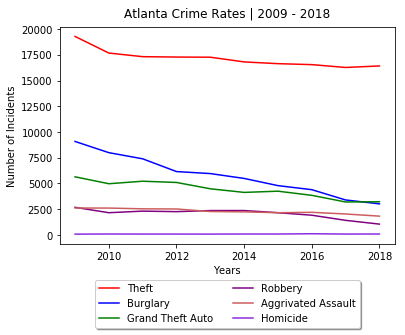

In [6]:
# Atlanta by year graph
x_axis = range(2009, 2019)
theft, = plt.plot(x_axis, atl_theft , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, atl_homicide, color="blueviolet", label="Homicide")

#Add labels to graph
plt.title("Atlanta Crime Rates | 2009 - 2018", pad=10)
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.275), ncol=2,shadow=True)
# plt.savefig("images/ATLYears2.jpg", pad_inches=2.5, dpi=300)

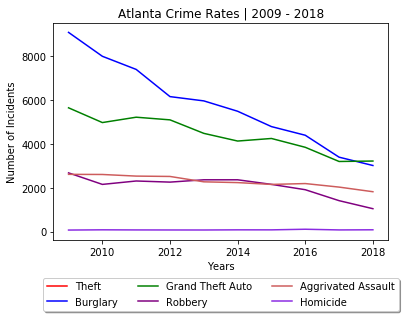

In [95]:
# Atlanta by year graph
x_axis = range(2009, 2019)
# theft, = plt.plot(x_axis, atl_theft , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, atl_homicide, color="blueviolet", label="Homicide")

#Add labels to graph
plt.title("Atlanta Crime Rates | 2009 - 2018")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
plt.savefig("images/ATLYearsZoom.png", dpi=300)

In [9]:
# atl_years = atl_short_df['Year'].unique()
# atl_theft = atl_short_df[atl_short_df['Crime'] == 'Theft'].groupby('Year')['Crime'].count()
# atl_burglary = atl_short_df[atl_short_df['Crime'] == 'Burglary'].groupby('Year')['Crime'].count()
# atl_auto = atl_short_df[atl_short_df['Crime'] == 'Grand Theft Auto'].groupby('Year')['Crime'].count()
# atl_robbery = atl_short_df[atl_short_df['Crime'] == 'Robbery'].groupby('Year')['Crime'].count()
# atl_aassault = atl_short_df[atl_short_df['Crime'] == 'Aggrivated Assault'].groupby('Year')['Crime'].count()
# atl_homicide = atl_short_df[atl_short_df['Crime'] == 'Homicide'].groupby('Year')['Crime'].count()
# atl_manslaughter = atl_short_df[atl_short_df['Crime'] == 'Manslaughter'].groupby('Year')['Crime'].count()

# atl_crime_df = pd.DataFrame({
#     "Theft" : atl_theft,
#     "Burglary" : atl_burglary,
#     "Grand Theft Auto" : atl_auto,
#     "Robbery" : atl_robbery,
#     "Aggrivated Assault" : atl_aassault,
#     "Homicide" : atl_homicide,
#     "Manslaughter" : atl_manslaughter
# })

# atl_crime_df.fillna(0).style.format("{:,}")

In [7]:
atl_month_df = atl_df.loc[:,["Crime", "Month", "Year"]]

In [8]:
## Atlanta 2019 ##
atl_theft_month_2019 = atl_month_df[(atl_month_df.Crime == 'Theft') & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_burglary_month_2019 = atl_month_df[(atl_month_df.Crime == 'Burglary') & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_auto_month_2019 = atl_month_df[(atl_month_df.Crime == 'Grand Theft Auto')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_robbery_month_2019 = atl_month_df[(atl_month_df.Crime == 'Robbery')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_aassault_month_2019 = atl_month_df[(atl_month_df.Crime == 'Aggrivated Assault')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_manslaughter_month_2019 = atl_month_df[(atl_month_df.Crime == 'Manslaughter')  & (atl_month_df.Year == 2019) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()

atl_crime_2019_df = pd.DataFrame({
    "2019": ["January", "February", "March"],
    "Theft" : atl_theft_month_2019,
    "Burglary" : atl_burglary_month_2019,
    "Grand Theft Auto" : atl_auto_month_2019,
    "Robbery" : atl_robbery_month_2019,
    "Aggrivated Assault" : atl_aassault_month_2019,
    "Manslaughter" : atl_manslaughter_month_2019
})
atl_crime_2019_df.index.name = None
atl_crime_2019_df.fillna(0).style.hide_index()

2019,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Manslaughter
January,1330,256,280,95,110,1
February,990,220,216,67,139,0
March,994,183,199,75,151,0


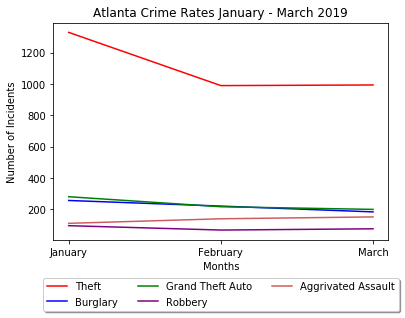

In [9]:
# Atlanta 2019 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, atl_theft_month_2019 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2019, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2019, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2019, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2019, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2019")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/ATL2019.png", dpi=300)

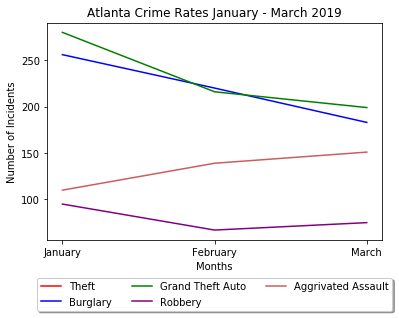

In [10]:
# Atlanta 2019 Zoom graph
x_axis = ('January', 'February', 'March')
# theft, = plt.plot(x_axis, atl_theft_month_2019 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2019, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2019, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2019, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2019, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2019")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/ATL2019Zoom.png", dpi=300)

In [35]:
## Atlanta 2018 ##
atl_theft_month_2018 = atl_month_df[(atl_month_df.Crime == 'Theft') & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_burglary_month_2018 = atl_month_df[(atl_month_df.Crime == 'Burglary') & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_auto_month_2018 = atl_month_df[(atl_month_df.Crime == 'Grand Theft Auto')  & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_robbery_month_2018 = atl_month_df[(atl_month_df.Crime == 'Robbery')  & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_aassault_month_2018 = atl_month_df[(atl_month_df.Crime == 'Aggrivated Assault')  & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_manslaughter_month_2018 = atl_month_df[(atl_month_df.Crime == 'Manslaughter')  & (atl_month_df.Year == 2018) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()

atl_crime_2018_df = pd.DataFrame({
    "2018": ["January", "February", "March"],
    "Theft" : atl_theft_month_2018,
    "Burglary" : atl_burglary_month_2018,
    "Grand Theft Auto" : atl_auto_month_2018,
    "Robbery" : atl_robbery_month_2018,
    "Aggrivated Assault" : atl_aassault_month_2018,
    "Manslaughter" : atl_manslaughter_month_2018
})

atl_crime_2018_df.index.name = None
atl_crime_2018_df.fillna(0).style.hide_index()

2018,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Manslaughter
January,1315,230,263,90,129,0
February,1227,227,238,99,128,0
March,1167,215,222,64,174,1


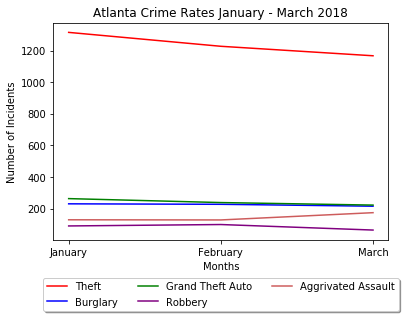

In [92]:
# Atlanta 2018 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, atl_theft_month_2018 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2018, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2018, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2018, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2018, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2018")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
plt.savefig("images/ATL2018.png", dpi=300)

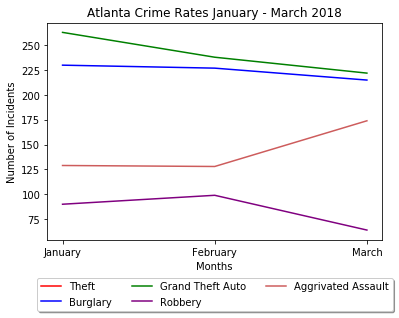

In [12]:
# Atlanta 2018 Zoom graph
x_axis = ('January', 'February', 'March')
# theft, = plt.plot(x_axis, atl_theft_month_2019 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2018, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2018, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2018, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2018, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2018")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/ATL2019Zoom.png", dpi=300)

In [13]:
## Atlanta 2017 ##
atl_theft_month_2017 = atl_month_df[(atl_month_df.Crime == 'Theft') & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_burglary_month_2017 = atl_month_df[(atl_month_df.Crime == 'Burglary') & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_auto_month_2017 = atl_month_df[(atl_month_df.Crime == 'Grand Theft Auto')  & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_robbery_month_2017 = atl_month_df[(atl_month_df.Crime == 'Robbery')  & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_aassault_month_2017 = atl_month_df[(atl_month_df.Crime == 'Aggrivated Assault')  & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()
atl_manslaughter_month_2017 = atl_month_df[(atl_month_df.Crime == 'Manslaughter')  & (atl_month_df.Year == 2017) & (atl_month_df.Month < 4)].groupby('Month')['Crime'].count()

atl_crime_2017_df = pd.DataFrame({
    "2017": ["January", "February", "March"],
    "Theft" : atl_theft_month_2017,
    "Burglary" : atl_burglary_month_2017,
    "Grand Theft Auto" : atl_auto_month_2017,
    "Robbery" : atl_robbery_month_2017,
    "Aggrivated Assault" : atl_aassault_month_2017,
    "Manslaughter" : atl_manslaughter_month_2017
})


atl_crime_2017_df.index.name = None
atl_crime_2017_df.fillna(0).style.hide_index()

2017,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Manslaughter
January,1262,340,283,137,154,0
February,1050,254,236,107,124,0
March,978,235,208,89,142,0


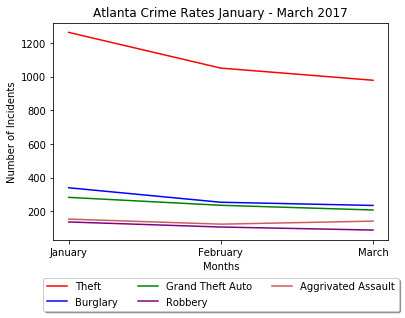

In [14]:
# Atlanta 2017 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, atl_theft_month_2017 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2017, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2017, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2017, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2017, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2017")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/ATL2017.png", dpi=300)

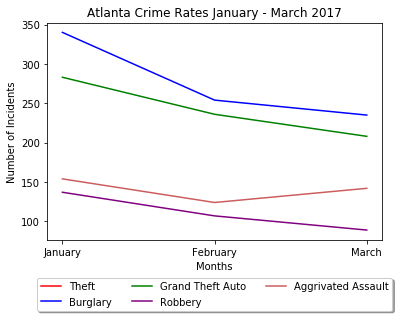

In [15]:
# Atlanta 2017 Zoom graph
x_axis = ('January', 'February', 'March')
# theft, = plt.plot(x_axis, atl_theft_month_2019 , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary_month_2017, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto_month_2017, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery_month_2017, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault_month_2017, color="indianred", label="Aggrivated Assault")

#Add labels to graph
plt.title("Atlanta Crime Rates January - March 2017")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/ATL2017Zoom.png", dpi=300)

In [20]:
### Minneapolis Work ###
# Combine the multiple file for Atlanta into one CSV
# path = '/mn'
# all_files = glob.glob(os.path.join(path, "*.csv"))
# df_from_each_file = (pd.read_csv(f) for f in all_files)
# mn_complete_df = pd.concat(df_from_each_file, ignore_index=True, sort=True)

# # Shape the combined CSV into a more manageable DataFrame
# mn_complete_df[['Year', 'Month', 'Day']] = mn_complete_df['ReportedDate'].astype(str).str.split("-",expand=True,)
# mn_complete_df['Day'] = mn_complete_df['Day'].str.split('T').str[0]

# # Shape the combined CSV into a more manageable DataFrame
# mn_sorted_df = mn_complete_df.loc[:, ["Description", "UCRCode", "Month", "Day", "Year", "X", "Y"]]

# # Rename a few things
# mn_df = mn_sorted_df.rename(columns={"Description" : "Crime", "UCRCode" : "UCR Code", "X" : "Latitude", "Y" : "Longitude"})
# mn_df.to_csv("patrick_stuff/mn1.csv", index=False)

In [17]:
mn_df = pd.read_csv('mn.csv')

In [18]:
mn_backup_df = mn_df
# mn_df.Crime.value_counts()

In [19]:
mn_combined_crime = mn_df.replace({
    "Other Theft" : "Theft",
    "Theft From Motr Vehc" : "Theft",
    "Theft From Person" : "Theft",
    "Bike Theft" : "Theft",
    "Shoplifting" : "Theft",
    "Other Vehicle Theft" : "Theft",
    "Theft By Swindle" : "Theft",
    "Pocket-picking" : "Theft",
    "On-line Theft" : "Theft",
    "Theft From Building" : "Theft",
    "Theft-motr Veh Parts" : "Theft",
    "Scrapping-Recycling Theft" : "Theft",
    "Theft/coinop Device" : "Theft",
    "Theft By Computer" : "Theft",
     "Gas Station Driv-off" : "Theft",
    "Burglary Of Business" : "Burglary",
    "Burglary Of Dwelling" : "Burglary",
    "Robbery Of Business" : "Burglary",
    "Robbery-Pedestrian" : "Robbery",
    "Robbery-Commercial" : "Robbery",
    "Robbery Of Person" : "Robbery",
    "Robbery Per Agg" : "Aggrivated Assault",
    "Aslt-sgnfcnt Bdly Hm": "Aggrivated Assault",
    "Aslt-great Bodily Hm" : "Aggrivated Assault",
    "Asslt W/dngrs Weapon" : "Aggrivated Assault",
    "Aslt-police/emerg P" : "Aggrivated Assault",
    "Motor Vehicle Theft" : "Grand Theft Auto",
    "Crim Sex Cond-rape" : "Sex Offense",
    "Domestic Assault/Strangulation" : "Domestic Assault",
    "1st Deg Domes Asslt" : "Domestic Assault",
    "2nd Deg Domes Aslt" : "Domestic Assault",
    "3rd Deg Domes Aslt" : "Domestic Assault", 
    "Murder (general)" : "Homicide"    
})
mn_combined_crime.Year.value_counts()

2017    22267
2012    21972
2013    21756
2011    21720
2014    21532
2010    20572
2015    19764
2018     7139
Name: Year, dtype: int64

In [20]:
mn_df = mn_combined_crime
mn_short_df = mn_df.loc[:,["Crime", "Year"]]
mn_short_df.Year.value_counts()

2017    22267
2012    21972
2013    21756
2011    21720
2014    21532
2010    20572
2015    19764
2018     7139
Name: Year, dtype: int64

In [37]:
mn_years = mn_short_df['Year'].unique()
mn_theft = mn_short_df[(mn_short_df.Crime == 'Theft') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_burglary = mn_short_df[(mn_short_df.Crime == 'Burglary') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_auto = mn_short_df[(mn_short_df.Crime == 'Grand Theft Auto') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_robbery = mn_short_df[(mn_short_df.Crime == 'Robbery') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_aassault = mn_short_df[(mn_short_df.Crime == 'Aggrivated Assault') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_homicide = mn_short_df[(mn_short_df.Crime == 'Homicide') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_domestic = mn_short_df[(mn_short_df.Crime == 'Domestic Assault') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_sex = mn_short_df[(mn_short_df.Crime == 'Sex Offense') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()
mn_arson = mn_short_df[(mn_short_df.Crime == 'Arson') & (mn_short_df.Year < 2018)].groupby('Year')['Crime'].count()

mn_crime_df = pd.DataFrame({
    "Theft": mn_theft,
    "Burglary": mn_burglary,
    "Grand Theft Auto": mn_auto,
    "Robbery": mn_robbery,
    "Aggrivated Assault": mn_aassault,
    "Homicide": mn_homicide,
    "Domestic Assault": mn_domestic,
    "Sex Offense" : mn_sex,
    "Arson" : mn_arson
})
mn_crime_df.index.name = None
mn_crime_df.fillna(0).style.format("{:,}")
mn_crime_df.T

,2010,2011,2012,2013,2014,2015,2017
Theft,10734,11646,12101,12226,12521,11022,12393
Burglary,4848,5149,4721,4606,4146,3566,3870
Grand Theft Auto,1786,1702,1750,1474,1426,1563,2147
Robbery,676,730,811,772,682,736,688
Aggrivated Assault,1602,1535,1652,1704,1813,1893,1998
Homicide,24,22,21,30,25,29,24
Domestic Assault,500,545,525,567,550,573,690
Sex Offense,288,259,280,259,259,274,345
Arson,113,132,111,115,109,105,112


In [38]:
ten = [10734, 4848, 1786, 676, 1602, 24, 500, 288, 113] 
eleven = [11646, 5149, 1702, 730, 1535, 22, 545, 259, 132]
twelve = [12101, 4721, 1750, 811, 1652, 21, 525, 280, 111]
thirteen = [12226, 4606, 1474, 772, 1704, 30, 567, 259, 115]
fourteen = [12521, 4146, 1426, 682, 1813, 25, 550, 259, 109]
fifteen = [11022, 3566, 1563, 736, 1893, 29, 572, 274, 105]
seventeen = [12393, 3870, 2147, 688, 1998, 24, 690, 345, 112]
stats.f_oneway(ten, eleven, twelve, thirteen, fourteen, fifteen, seventeen)

F_onewayResult(statistic=0.006009237580613554, pvalue=0.9999989324761153)

In [27]:
# x_axis = range(2010, 2019)
# theft_incidents = atl_theft 
# burglary_incidents = atl_burglary
# auto_incidents = atl_auto
# robbery_incidents = atl_robbery
# assault_incidents = atl_aassault
# homicide_incidents = atl_homicide

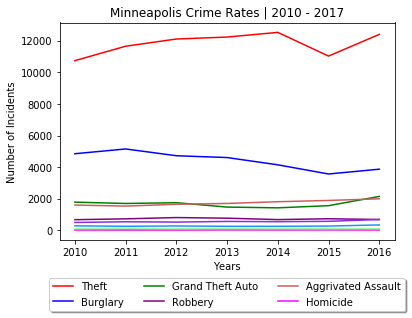

In [22]:
# Minneapolis by year graph
x_axis = range(2010, 2017)
theft, = plt.plot(x_axis, mn_theft, color="red", label="Theft")
burglary, = plt.plot(x_axis, mn_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, mn_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, mn_homicide, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates | 2010 - 2017")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MNYears.png", dpi=300)

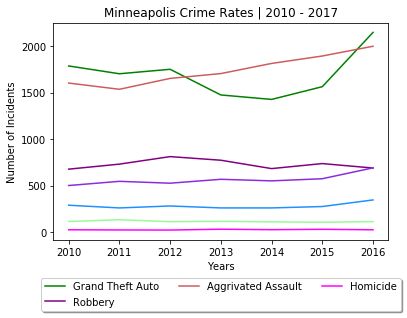

In [23]:
# Minneapolis by year graph
x_axis = range(2010, 2017)
auto, = plt.plot(x_axis, mn_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, mn_homicide, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates | 2010 - 2017")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MNYearsZoom.png", dpi=300)

In [24]:
# 2011, 2012, 2013
mn_month_df = mn_df.loc[:,["Crime", "Month", "Year"]]

In [25]:
## Indianapolis 2011 ##
mn_theft_month_2011 = mn_month_df[(mn_month_df.Crime == 'Theft') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_burglary_month_2011 = mn_month_df[(mn_month_df.Crime == 'Burglary') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_auto_month_2011 = mn_month_df[(mn_month_df.Crime == 'Grand Theft Auto') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_robbery_month_2011 = mn_month_df[(mn_month_df.Crime == 'Robbery') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_aassault_month_2011 = mn_month_df[(mn_month_df.Crime == 'Aggrivated Assault') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_homicide_month_2011 = mn_month_df[(mn_month_df.Crime == 'Homicide') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_domestic_month_2011 = mn_month_df[(mn_month_df.Crime == 'Domestic Assault') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_sex_month_2011 = mn_month_df[(mn_month_df.Crime == 'Sex Offense') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_arson_month_2011 = mn_month_df[(mn_month_df.Crime == 'Arson') & (mn_month_df.Year == 2011) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()

mn_crime_2011_df = pd.DataFrame({
    "2011": ["January", "February", "March"],
    "Theft": mn_theft_month_2011,
    "Burglary": mn_burglary_month_2011,
    "Grand Theft Auto": mn_auto_month_2011,
    "Robbery": mn_robbery_month_2011,
    "Aggrivated Assault": mn_aassault_month_2011,
    "Homicide": mn_homicide_month_2011,
    "Domestic Assault": mn_domestic_month_2011,
    "Sex Offense" : mn_sex_month_2011,
    "Arson" : mn_arson_month_2011
})


mn_crime_2011_df.index.name = None
mn_crime_2011_df.fillna(0).style.hide_index()

2011,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Domestic Assault,Sex Offense,Arson
January,681,329,124,45,95,2,43,20,3
February,611,252,115,41,66,1,33,12,0
March,758,324,104,41,91,2,39,21,8


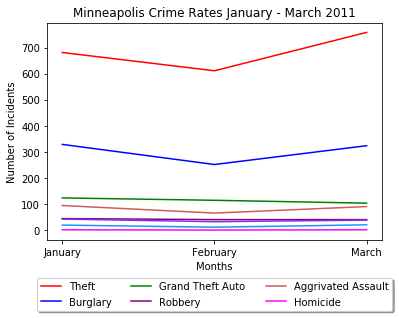

In [26]:
# Minneapolis 2011 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, mn_theft_month_2011, color="red", label="Theft")
burglary, = plt.plot(x_axis, mn_burglary_month_2011, color="blue", label="Burglary")
auto, = plt.plot(x_axis, mn_auto_month_2011, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2011, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2011, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, mn_homicide_month_2011, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2011, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2011, color="dodgerblue", label="Sex Offense")
# arson, = plt.plot(x_axis, mn_arson_month_2011, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2011")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MN2011.png", dpi=300)

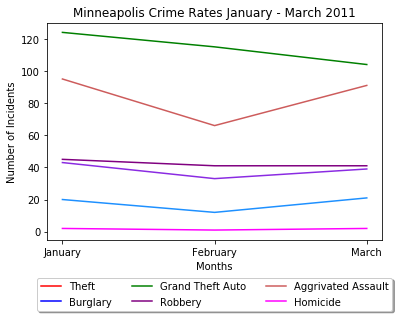

In [85]:
# Minneapolis 2011 Zoom graph
x_axis = ('January', 'February', 'March')
auto, = plt.plot(x_axis, mn_auto_month_2011, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2011, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2011, color="indianred", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, mn_homicide_month_2011, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2011, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2011, color="dodgerblue", label="Sex Offense")
# arson, = plt.plot(x_axis, mn_arson_month_2011, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2011")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
plt.savefig("images/MN2011Zoom.png", dpi=300)

In [27]:
## Indianapolis 2012 ##
mn_theft_month_2012 = mn_month_df[(mn_month_df.Crime == 'Theft') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_burglary_month_2012 = mn_month_df[(mn_month_df.Crime == 'Burglary') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_auto_month_2012 = mn_month_df[(mn_month_df.Crime == 'Grand Theft Auto') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_robbery_month_2012 = mn_month_df[(mn_month_df.Crime == 'Robbery') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_aassault_month_2012 = mn_month_df[(mn_month_df.Crime == 'Aggrivated Assault') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_homicide_month_2012 = mn_month_df[(mn_month_df.Crime == 'Homicide') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_domestic_month_2012 = mn_month_df[(mn_month_df.Crime == 'Domestic Assault') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_sex_month_2012 = mn_month_df[(mn_month_df.Crime == 'Sex Offense') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_arson_month_2012 = mn_month_df[(mn_month_df.Crime == 'Arson') & (mn_month_df.Year == 2012) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()

mn_crime_2012_df = pd.DataFrame({
    "2012": ["January", "February", "March"],
    "Theft": mn_theft_month_2012,
    "Burglary": mn_burglary_month_2012,
    "Grand Theft Auto": mn_auto_month_2012,
    "Robbery": mn_robbery_month_2012,
    "Aggrivated Assault": mn_aassault_month_2012,
    "Homicide": mn_homicide_month_2012,
    "Domestic Assault": mn_domestic_month_2012,
    "Sex Offense" : mn_sex_month_2012,
    "Arson" : mn_arson_month_2012
})

mn_crime_2012_df.index.name = None
mn_crime_2012_df.fillna(0).style.hide_index()

2012,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Domestic Assault,Sex Offense,Arson
January,813,320,188,52,105,0,41,22,3
February,699,269,144,49,101,1,48,25,5
March,925,340,120,64,168,1,53,24,8


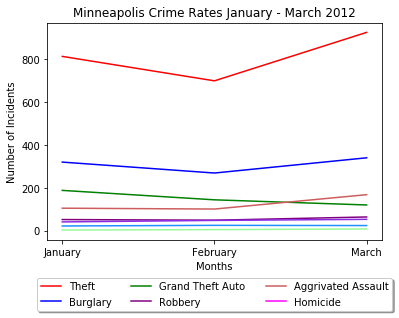

In [29]:
# Minneapolis 2012 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, mn_theft_month_2012, color="red", label="Theft")
burglary, = plt.plot(x_axis, mn_burglary_month_2012, color="blue", label="Burglary")
auto, = plt.plot(x_axis, mn_auto_month_2012, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2012, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2012, color="indianred", label="Aggrivated Assault")
# homicide, = plt.plot(x_axis, mn_homicide_month_2012, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2012, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2012, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson_month_2012, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2012")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MN2012.png", dpi=300)

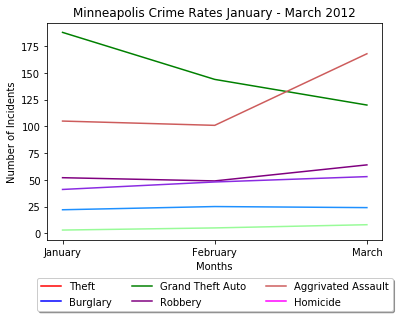

In [28]:
# Minneapolis 2012 Zoom graph
x_axis = ('January', 'February', 'March')
auto, = plt.plot(x_axis, mn_auto_month_2012, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2012, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2012, color="indianred", label="Aggrivated Assault")
# homicide, = plt.plot(x_axis, mn_homicide_month_2012, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2012, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2012, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson_month_2012, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2012")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MN2012Zoom.png", dpi=300)

In [32]:
## Indianapolis 2013 ##
mn_theft_month_2013 = mn_month_df[(mn_month_df.Crime == 'Theft') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_burglary_month_2013 = mn_month_df[(mn_month_df.Crime == 'Burglary') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_auto_month_2013 = mn_month_df[(mn_month_df.Crime == 'Grand Theft Auto') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_robbery_month_2013 = mn_month_df[(mn_month_df.Crime == 'Robbery') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_aassault_month_2013 = mn_month_df[(mn_month_df.Crime == 'Aggrivated Assault') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_homicide_month_2013 = mn_month_df[(mn_month_df.Crime == 'Homicide') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_domestic_month_2013 = mn_month_df[(mn_month_df.Crime == 'Domestic Assault') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_sex_month_2013 = mn_month_df[(mn_month_df.Crime == 'Sex Offense') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()
mn_arson_month_2013 = mn_month_df[(mn_month_df.Crime == 'Arson') & (mn_month_df.Year == 2013) & (mn_month_df.Month < 4)].groupby('Month')['Crime'].count()

mn_crime_2013_df = pd.DataFrame({
    "2013": ["January", "February", "March"],
    "Theft": mn_theft_month_2013,
    "Burglary": mn_burglary_month_2013,
    "Grand Theft Auto": mn_auto_month_2013,
    "Robbery": mn_robbery_month_2013,
    "Aggrivated Assault": mn_aassault_month_2013,
    "Homicide": mn_homicide_month_2013,
    "Domestic Assault": mn_domestic_month_2013,
    "Sex Offense" : mn_sex_month_2013,
    "Arson" : mn_arson_month_2013
})

mn_crime_2013_df.index.name = None
mn_crime_2013_df.fillna(0).style.hide_index()

2013,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Domestic Assault,Sex Offense,Arson
January,842,343,141,45,102,0,32,20,6
February,746,222,100,43,120,1,37,21,6
March,770,269,115,42,105,2,44,15,4


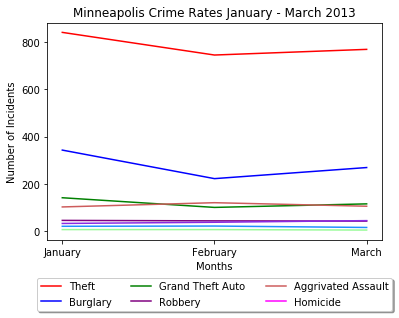

In [33]:
# Minneapolis 2013 graph
x_axis = ('January', 'February', 'March')
theft, = plt.plot(x_axis, mn_theft_month_2013, color="red", label="Theft")
burglary, = plt.plot(x_axis, mn_burglary_month_2013, color="blue", label="Burglary")
auto, = plt.plot(x_axis, mn_auto_month_2013, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2013, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2013, color="indianred", label="Aggrivated Assault")
# homicide, = plt.plot(x_axis, mn_homicide_month_2013, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2013, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2013, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson_month_2013, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2013")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MN2013.png", dpi=300)

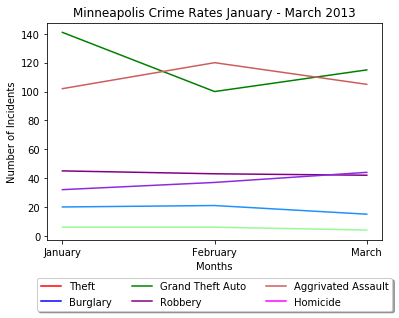

In [34]:
# Minneapolis 2013 Zoom graph
x_axis = ('January', 'February', 'March')
auto, = plt.plot(x_axis, mn_auto_month_2013, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery_month_2013, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault_month_2013, color="indianred", label="Aggrivated Assault")
# homicide, = plt.plot(x_axis, mn_homicide_month_2013, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic_month_2013, color="blueviolet", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex_month_2013, color="dodgerblue", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson_month_2013, color="palegreen", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates January - March 2013")
plt.xlabel("Months")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc='center', bbox_to_anchor=(.5, -.25), ncol=3, fancybox=True, shadow=True)
# plt.savefig("images/MN2013Zoom.png", dpi=300)